# 결정론적 추세 추정

## 추세

확률 과정의 기대값이 시간 $t$에 대한 함수로 표현될 수 있으면 이를 **추세(trend)**라고 한다.

$$ \mu_t = \text{E}[Y_t] = f(t) $$

보통은 추세 함수 $f(t)$가 상수가 아니라 $t$에 따라 변화하는 경우, **추세를 가진다**고 말한다. 
이 추세는 확률 변수가 아닌 함수로 표현할 수 있기 때문에 **결정론적 추세(deterministic trend)**라고도 한다.

다음 시계열들은 모두 추세를 가지는 확률 과정의 샘플이다.

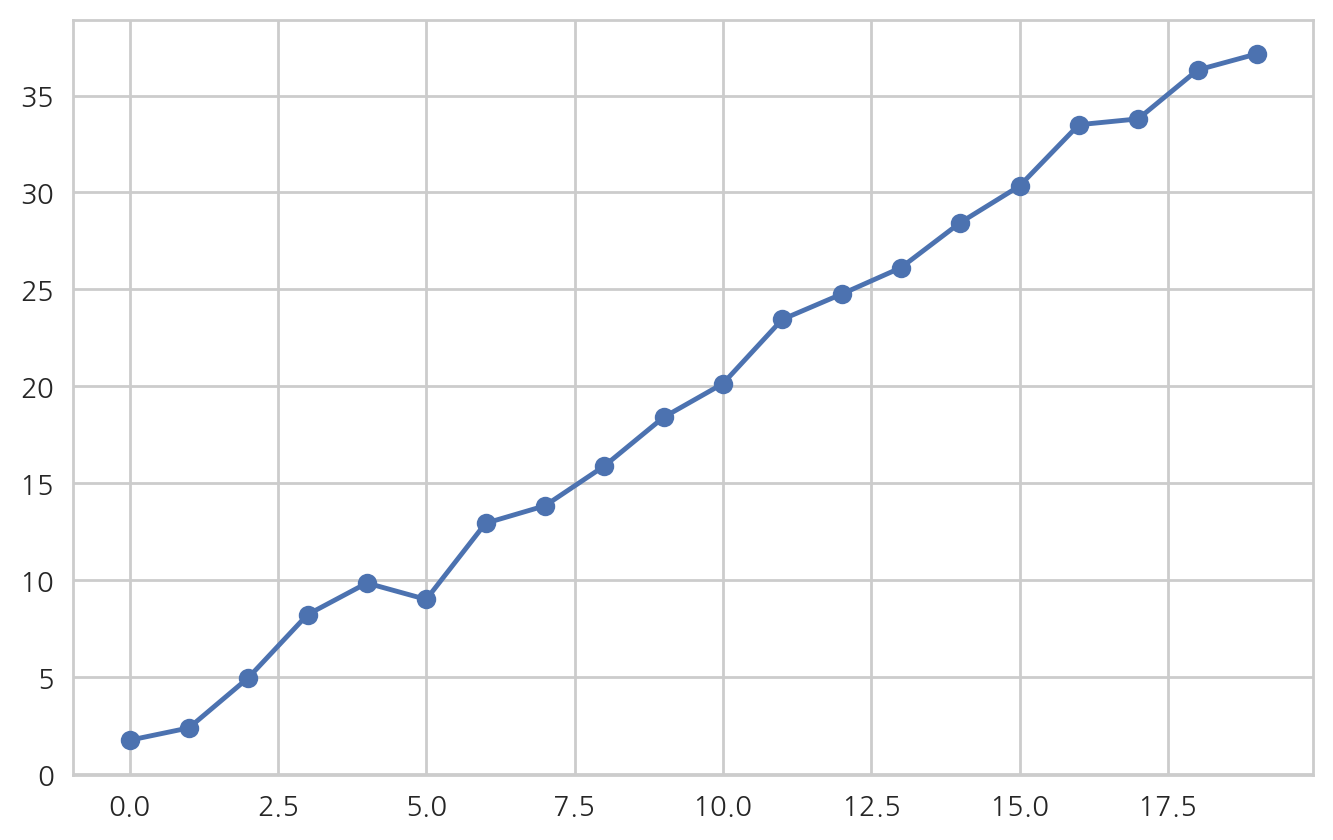

In [1]:
np.random.seed(0)
t = np.arange(20)
x = 2 * t + sp.stats.norm.rvs(size=20)
plt.plot(t, x, 'o-')
plt.show()

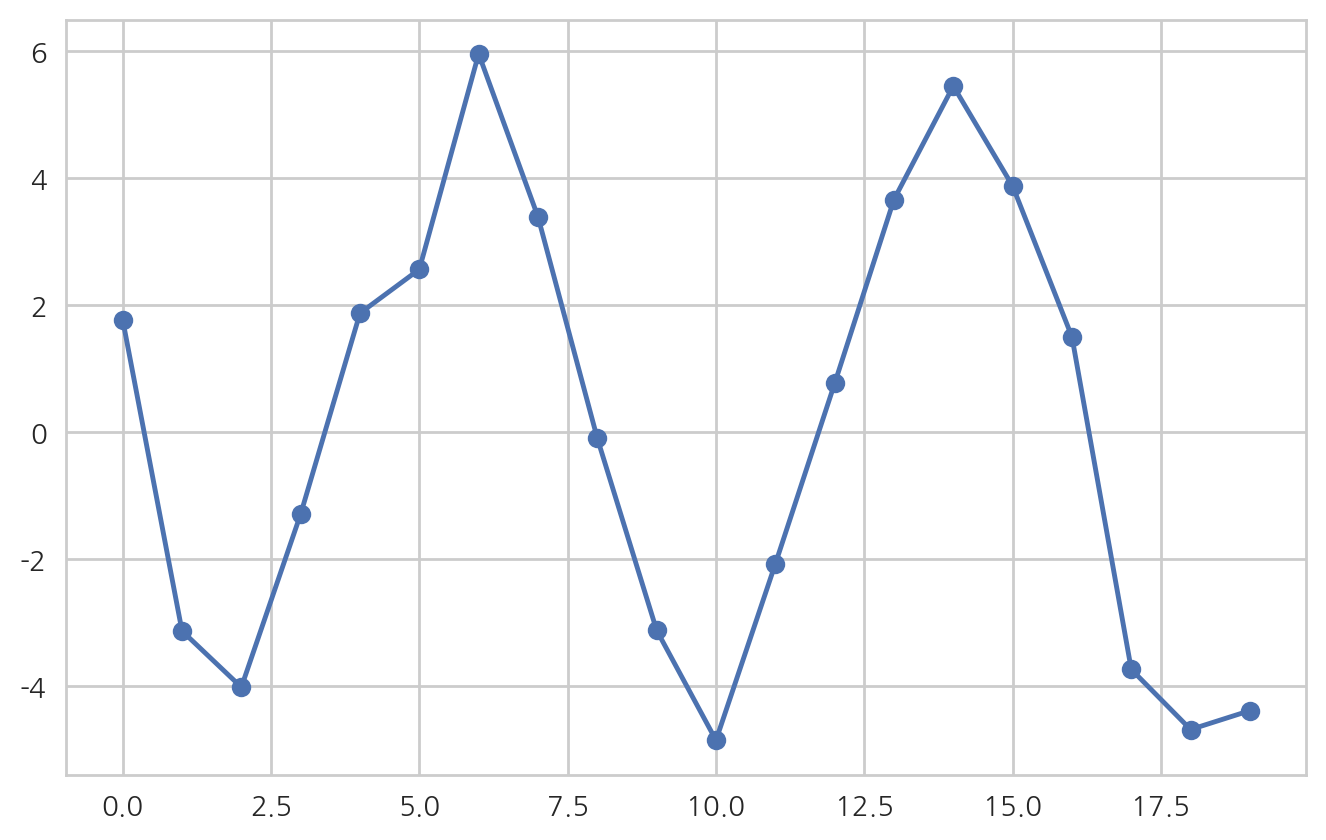

In [2]:
np.random.seed(0)
t = np.arange(20)
x = -5 * np.sin(0.25 * np.pi * t) + sp.stats.norm.rvs(size=20)
plt.plot(t, x, 'o-')
plt.show()

다시 말하지만 확률 과정의 기댓값은 앙상블(Ensemble) 개념이므로 앞으로 이야기할 정상 가정과 에르고딕 가정이 없다면  **하나의 샘플에서 추세가 있다고 판단하거나 추세를 추정하는 것은 원리적으로 불가능하다**. 이러한 가정 없이 추세를 추정하기 위해서는 다음과 같이 복수개의 시계열 자료 샘플이 있어야 한다.

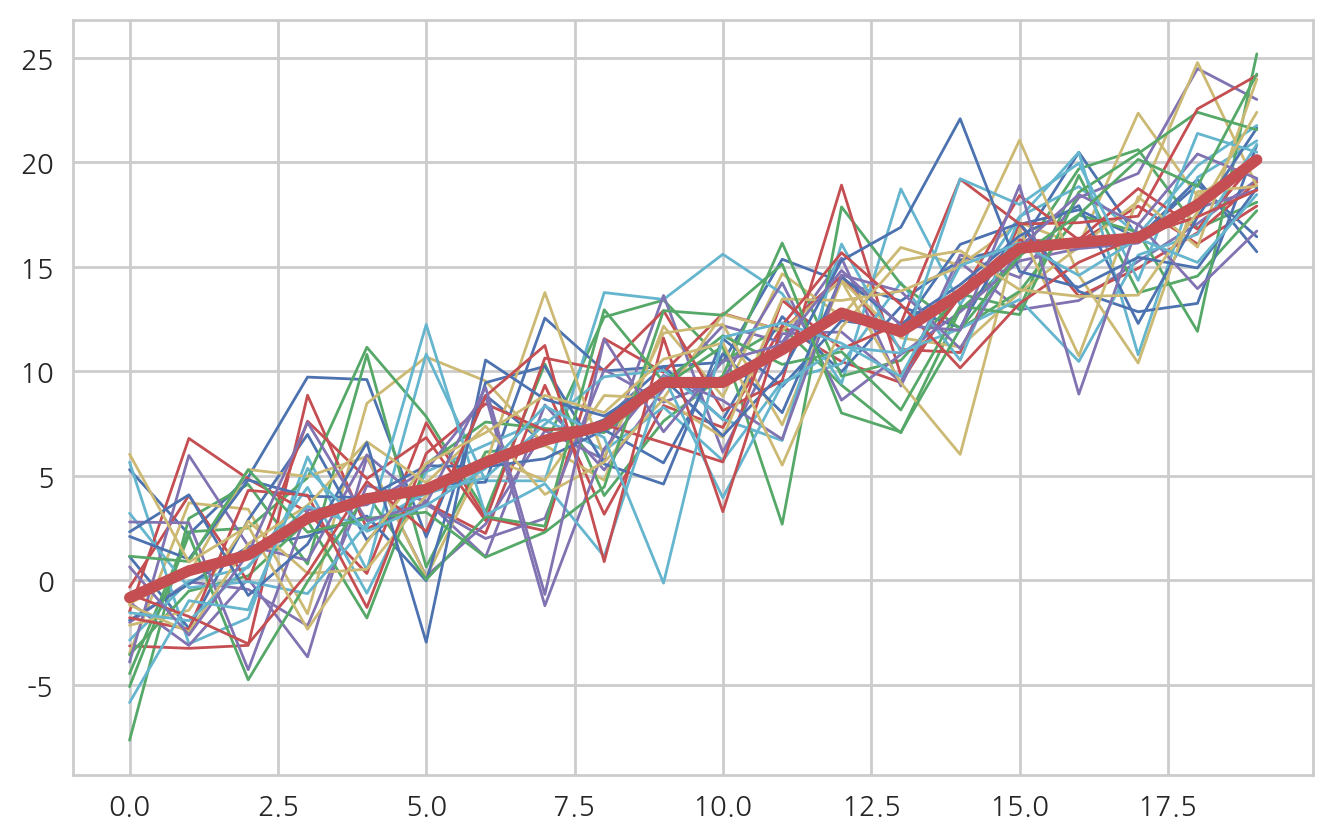

In [3]:
np.random.seed(0)
t = np.arange(20)
y = np.zeros((30, 20))
for i in range(30):
    y[i,:] = t + 3 * sp.stats.norm.rvs(size=20)
    plt.plot(t, y[i], lw=1);
plt.plot(t, np.mean(y, axis=0), 'r-', lw=4)
plt.show()

## 결정론적 추세 추정

확률 과정의 기댓값이 시간에 대한 함수로 표현될 수 있을 때 추세(trend)를 가진다고 한다. (결정론적) **추세 추정(trend estimation)**은 것은 이 기댓값 함수의 형태를 알아내는 것을 말한다. 

추세에 대한 소개는 다음 노트북을 참조한다.

추세를 가진다는 것은 결국 확률 과정이 정상 과정(stationary process)이 아니라 비정상 과정(non-stationary process)임을 뜻한다. 그러나 분석을 쉽게 하기 위해 보통 다음과 같은 가정을 한다.

* 우리가 분석하고자하는 확률 과정 $Y_t$이 일반적인 비정상 과정이 아니라 추정이 가능한 **결정론적 추세 함수 $f(t)$와 확률 정상 과정 $X_t$의 합**으로 표현될 수 있다. 

$$ Y_t \sim f(t) + X_t $$


계절성도 추세에 포함 된다고 볼 수 있다.

* 다항식 추세 (polynomial trend)
* 계절성 추세 (seasonality)

## 다항식 추세

다항식 추세 분석 방법은 추세 함수 즉, 확률 과정의 기댓값을 시간에 대한 다항식으로 나타낼 수 있다고 가정하는 것이다.

$$ f(t) = \sum_{i=0}^M a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots $$

가장 단순한 모형으로 선형 추세를 가지는 경우를 살펴보자.

미국 항공운송량 자료의 선형 추세를 구해본다.

In [4]:
df = sm.datasets.get_rdataset("AirPassengers").data

def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

df["datetime"] = df.time.map(yearfraction2datetime)

df.tail()

,time,AirPassengers,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


In [5]:
result = sm.OLS.from_formula("AirPassengers ~ time", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          AirPassengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           4.02e-61
Time:                        14:16:31   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.206e+04   2166.077    -28.649      0.0

In [ ]:
## likelihood는 더 커져야 좋은것 
## 

위 회귀 분석 결과 보고서에서 추세 함수가 다음과 같다는 것을 할 수 있다.

$$ f(t) = 31.8862 t - 62060 $$

이를 플롯으로 나타내면 아래와 같다.

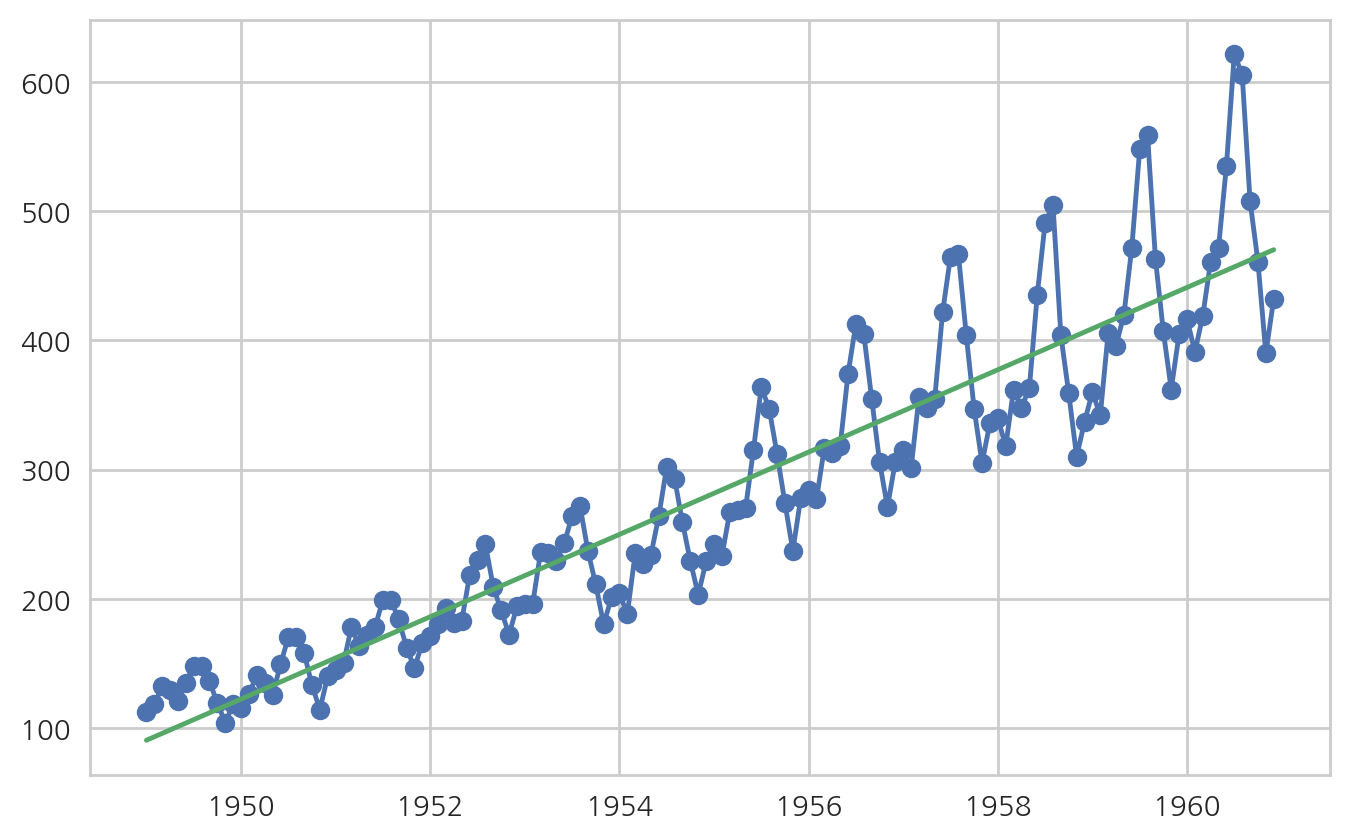

In [6]:
t = df.time
y = df.AirPassengers
trend = result.params[0] + result.params[1] * t
plt.plot(t, y, 'o-', t, trend, '-')
plt.show()

만약 추세가 2차 함수 형태라면 다음과 같이 추세를 추정할 수 있다.

In [7]:
result2 = sm.OLS.from_formula("AirPassengers ~ time + I(time ** 2)", data=df).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          AirPassengers   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     439.8
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           2.49e-61
Time:                        14:16:32   Log-Likelihood:                -750.67
No. Observations:                 144   AIC:                             1507.
Df Residuals:                     141   BIC:                             1516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.795e+06   1.33e+06      2.848   

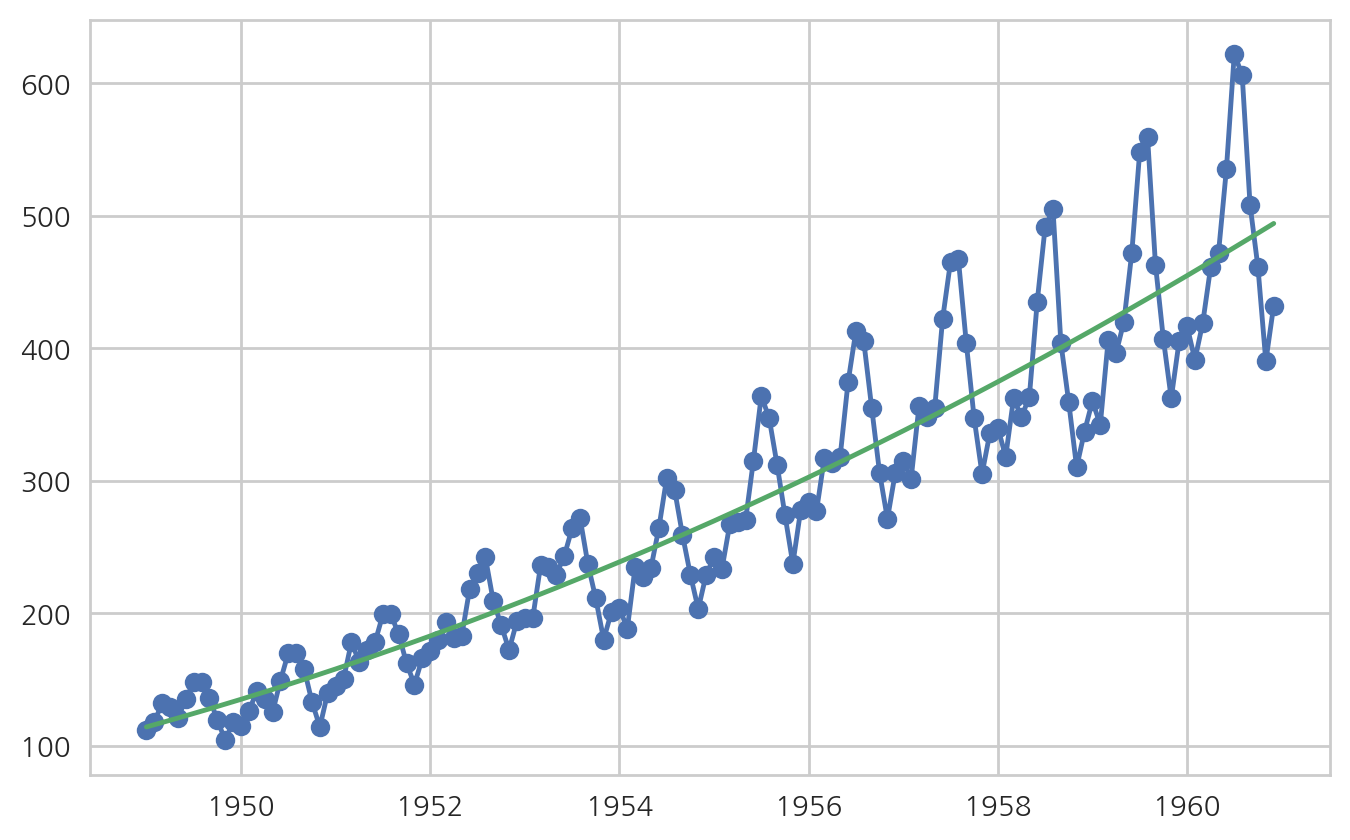

In [8]:
trend2 = result2.params[0] + result2.params[1] * t + result2.params[2] * t**2
plt.plot(t, y, 'o-', t, trend2, '-')
plt.show()

## 계절성 추세

계절성 추세는 특정한 달(month)이나 요일(day of week)에 따라 기댓값이 달라지는 것을 말한다. 이는 달 이름이나 요일 이름을 카테고리(category) 값으로 사용하여 회귀분석하여 추정할 수 있다.

황호흡기질환 사망자수 자료를 이용하여 분석해보자.

In [9]:
df2 = sm.datasets.get_rdataset("deaths", "MASS").data
df2["datetime"] = df2.time.map(yearfraction2datetime)
df2.tail()

,time,deaths,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


In [10]:
df2["month"] = df2.datetime.dt.month
df2.tail()

,time,deaths,datetime,month
67,1979.583333,1354,1979-08-01,8
68,1979.666667,1333,1979-09-01,9
69,1979.750000,1492,1979-10-01,10
70,1979.833333,1781,1979-11-01,11
71,1979.916667,1915,1979-12-01,12


In [11]:
result = sm.OLS.from_formula('deaths ~ C(month) - 1', data=df2).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           6.55e-21
Time:                        14:16:36   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502   

모형식 문자열에서 "-1"은 y 절편을 모형에 넣지 않는 것을 의미한다. 즉, 모든 month변수의 가능한 값을 사용한다. month 변수가 0과 1값을 가지는 dummy 변수이기때문에 이 분석에서 구한 계수는 특정한 달의 기온 평균값이 된다. 

추정한 계절성 성분과 나머지 성분을 분리하여 그리면 다음과 같다.

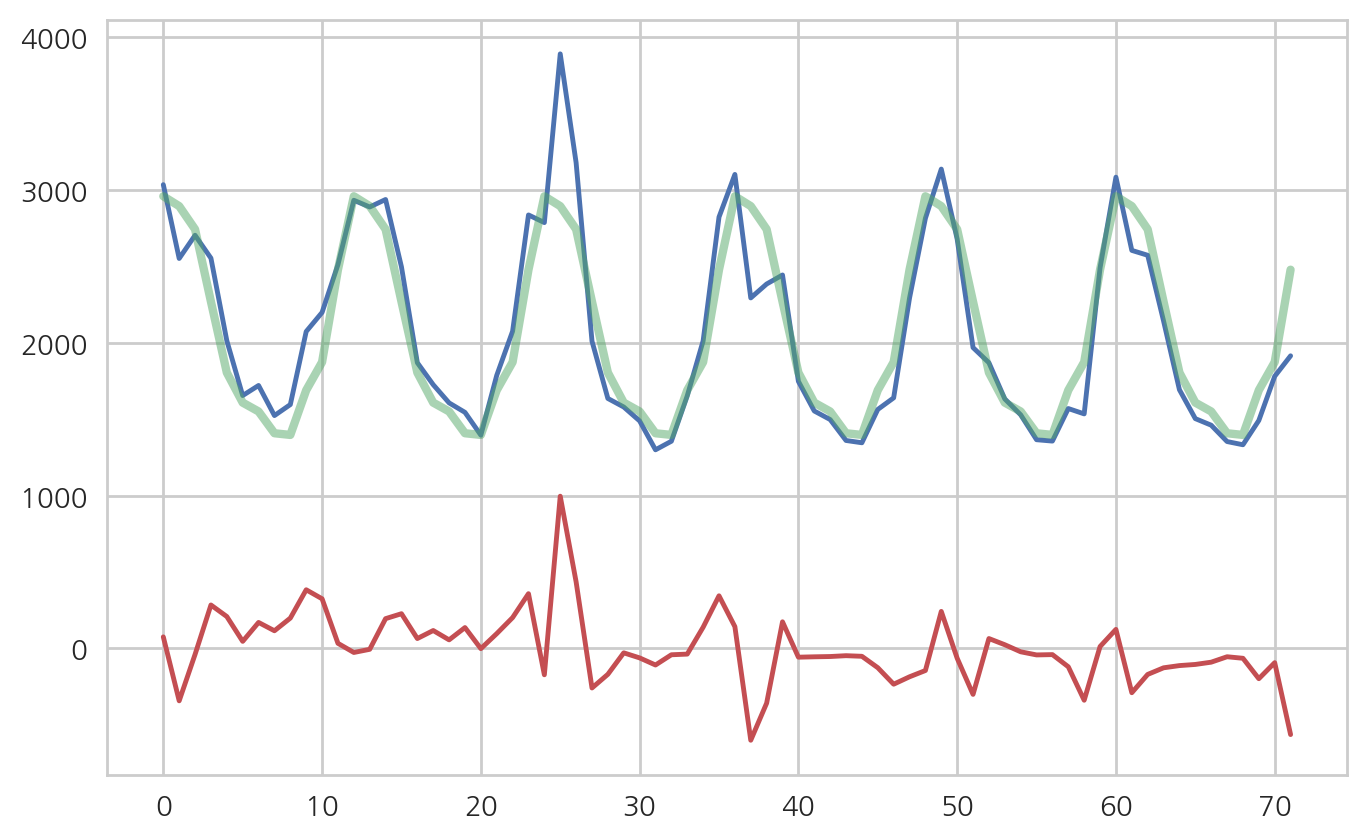

In [12]:
plt.plot(df2.deaths)
plt.plot(result.fittedvalues, lw=3, alpha=0.5)
plt.plot(result.resid)
plt.show()

위 방법으로 찾아낸 잔차 시계열을 보면 시간이 지나갈 수록 점점 감소하고 있는 것을 알 수 있다.

이러한 선형 추세까지 한꺼번에 잡아내려면 다음과 같이 회귀분석을 하면 된다. 

In [13]:
result2 = sm.OLS.from_formula('deaths ~ time + C(month) - 1', data=df2).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     36.43
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           8.56e-23
Time:                        14:16:37   Log-Likelihood:                -486.75
No. Observations:                  72   AIC:                             999.5
Df Residuals:                      59   BIC:                             1029.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   1.204e+05   3.15e+04      3.825   

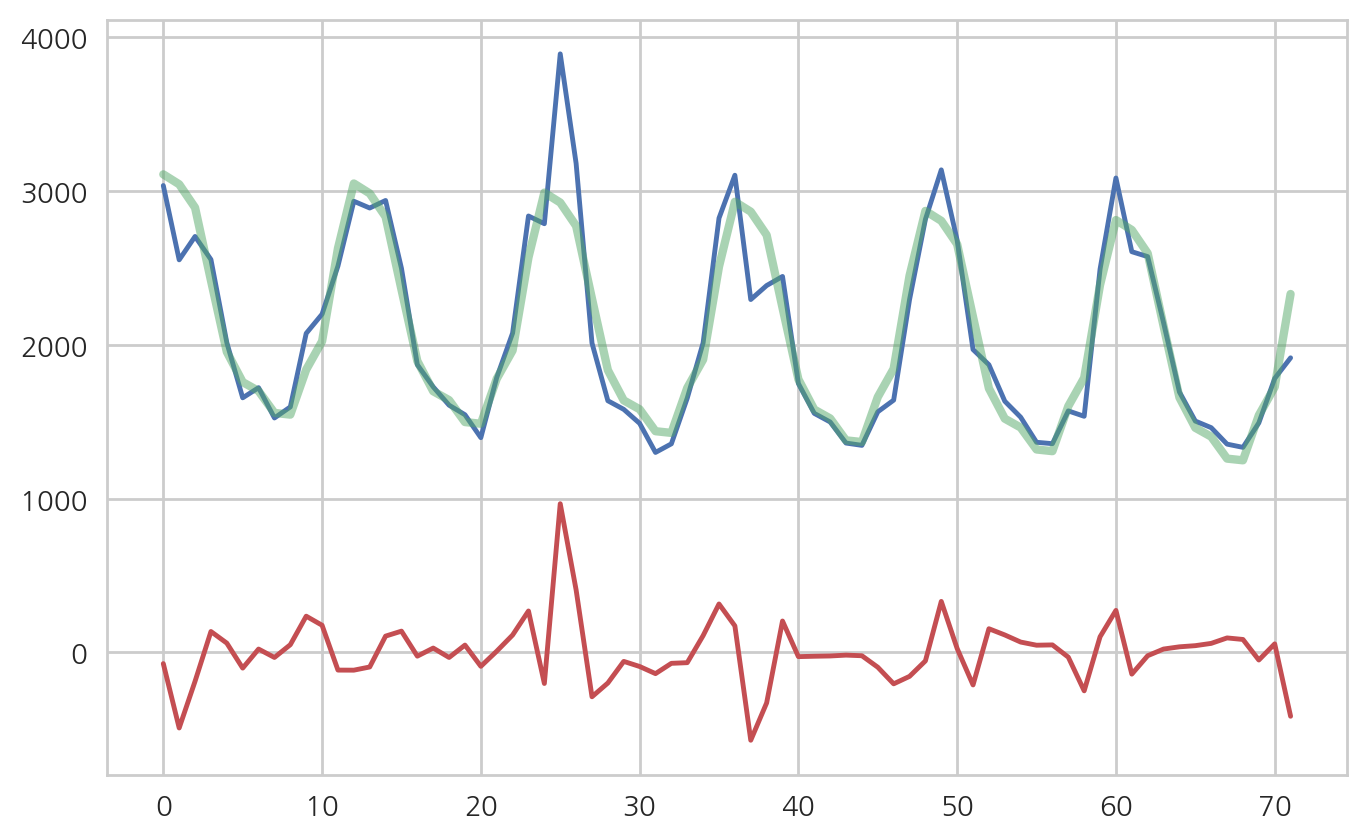

In [15]:
plt.plot(df2.deaths)
plt.plot(result2.fittedvalues, lw=3, alpha=0.5)
plt.plot(result2.resid)
plt.show()

이번에는 위에서 보았던 항공 운송량 데이터를 계절성까지 포함하여 추세 추정을 해보자. 우선 로그변환으로 정규분포를 만든다.

In [17]:
df["LogAirPassengers"] = np.log(df.AirPassengers)
df["month"] = df.datetime.dt.month
df.tail()

,time,AirPassengers,datetime,LogAirPassengers,month
139,1960.583333,606,1960-08-01,6.406880,8
140,1960.666667,508,1960-09-01,6.230481,9
141,1960.750000,461,1960-10-01,6.133398,10
142,1960.833333,390,1960-11-01,5.966147,11
143,1960.916667,432,1960-12-01,6.068426,12


In [19]:
result3 = sm.OLS.from_formula("LogAirPassengers ~ time + C(month) + 0", data=df).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:       LogAirPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Thu, 06 Jul 2017   Prob (F-statistic):          2.31e-110
Time:                        14:19:29   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   -230.7524      2.798    -82.467   

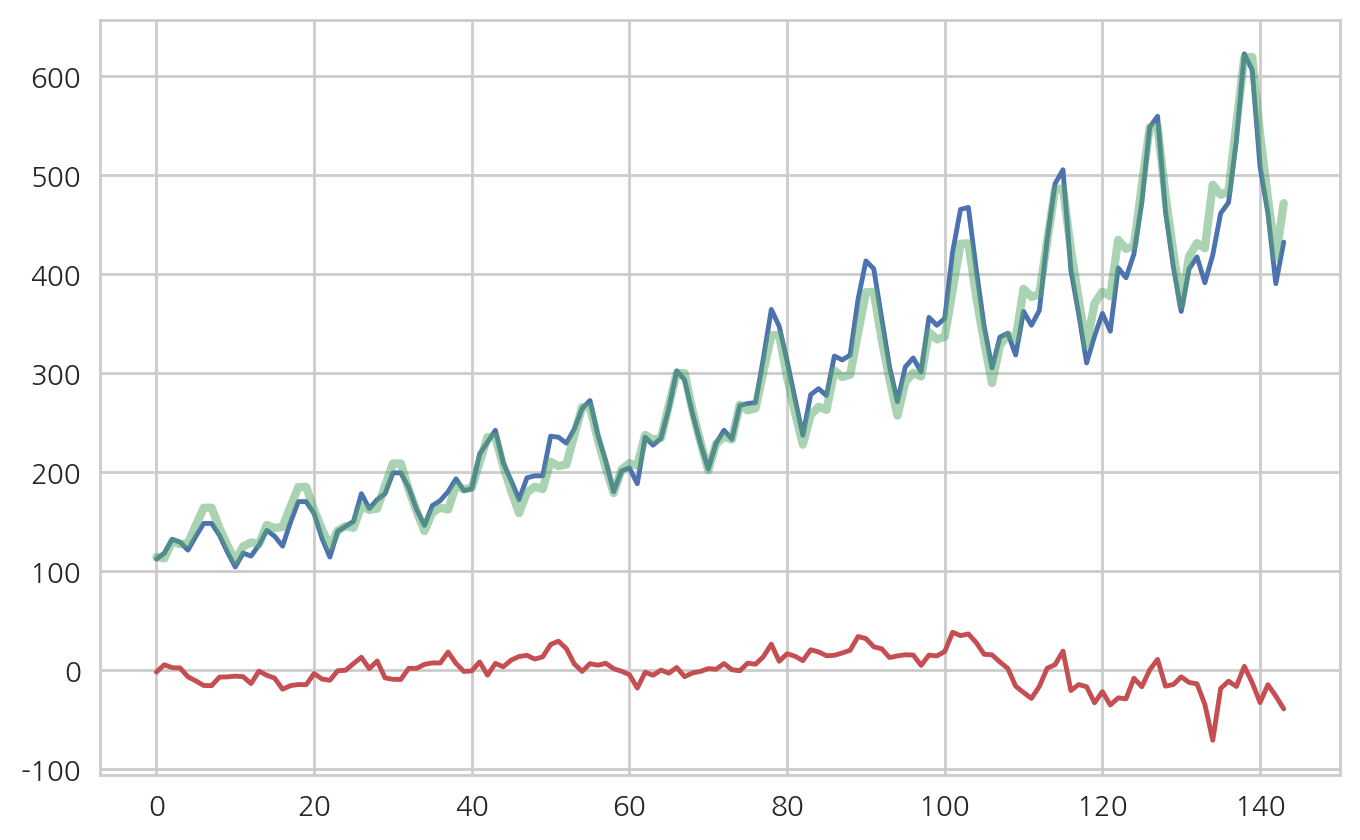

In [22]:
plt.plot(df.AirPassengers)
plt.plot(np.exp(result3.fittedvalues), lw=3, alpha=0.5)
plt.plot(df.AirPassengers - np.exp(result3.fittedvalues))
plt.show()